# Topic Modelling

### What is Topic Modelling?

In my words Topic Modelling is the process of extracting major themes from a given corpus of text data.

**Wikipedia Definition** <br>
In machine learning and natural language processing, a topic model is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents.
<br><br>
**Usage**<br>
In the age of information, the amount of the written material we encounter each day is simply beyond our processing capacity. Topic models can help to organize and offer insights for us to understand large collections of unstructured text bodies.<br>
Originally developed as a text-mining tool, topic models have also been used to detect instructive structures in data such as genetic information, images, and networks.<br>

**History**<br>
Original technique for topic modelling was developed in 1998 by Raghavan, Tamaki and Vempala. Then came the **PLSA (Probabilistic Latent Semantic Analysis)** in 1998 created by Thomas Hoffman.<br>
Most commonly used technique called the <font color='green'>**LDA (Latent Drichilet Allocation)**</font> was developed in 2002 by Andrew Ng, David Blei and Michael Jordan. Another technique which is an extension of LDA is called the **Pachinko Allocation** and improves on LDA by modeling correlations between topics in addition to the word correlations which constitute topics.<br>
An alternative to LDA is the **HLTA (Heirarchical Latent Tree Analysis)**, which models word co-occurrence using a tree of latent variables and the states of the latent variables, which correspond to soft clusters of documents, are interpreted as topics.

## LDA - Latent Drichilet Allocation

**Dependenices**

In [26]:
#Dependencies
import pandas as pd
import gensim #the library for Topic modelling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
# import pyLDAvis.gensim #LDA visualization library

import pyLDAvis
import pyLDAvis.gensim_models

from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')
from itertools import chain

**Read  all_sentiment.csv file**

In [2]:
df = pd.read_csv('all_sentiment.csv')
df.head(3)

,Unnamed: 0,date,content,clean,stemmed,lemmatized,sentiment
0,0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,forecast,forecast,forecast,0.0000
1,1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel busi meet take fun trip especi prepar p...,traveling business meeting take fun trip espec...,0.9313
2,2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way go,test success way go,test successful way go,0.5859


**Clean the data**

In [5]:
#clean the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(lemmatized):
    stop_free = ' '.join([word for word in lemmatized.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [6]:
df['text_lemmatized']=df['lemmatized'].apply(clean)

In [7]:
df['text_clean']=df['clean'].apply(clean)

**Dataframe after cleaning**

In [8]:
# Making new DataFrame out of existing DataFrame
df.head()

,Unnamed: 0,date,content,clean,stemmed,lemmatized,sentiment,text_lemmatized,text_clean
0,0,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",Here is our forecast\n\n,forecast,forecast,forecast,0.0000,[forecast],[forecast]
1,1,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,travel busi meet take fun trip especi prepar p...,traveling business meeting take fun trip espec...,0.9313,"[traveling, business, meeting, take, fun, trip...","[traveling, business, meeting, take, fun, trip..."
2,2,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",test successful. way to go!!!,test successful way go,test success way go,test successful way go,0.5859,"[test, successful, way, go]","[test, successful, way, go]"
3,3,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)","Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,randi send schedul salari level everyon schedu...,randy send schedule salary level everyone sche...,0.0000,"[randy, send, schedule, salary, level, everyon...","[randy, send, schedule, salary, level, everyon..."
4,4,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400,"[let, shoot, tuesday, 1145]","[let, shoot, tuesday, 1145]"


In [9]:
df_lemma_clean = df[['text_lemmatized', 'text_clean']]

**Create Dictionary **

In [13]:
#create dictionary
dictionary = corpora.Dictionary(df_lemma_clean['text_lemmatized'])

# Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus).
print(dictionary.num_nnz)

50742063


**Create document term matrix**

In [14]:
#create document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_lemma_clean['text_lemmatized'] ]

print(len(doc_term_matrix))

517108


**Instantiate LDA model**

In [15]:
lda = gensim.models.ldamodel.LdaModel

**Fit LDA model on the dataset**

In [33]:
num_topics = 3
ldamodel = lda(doc_term_matrix, num_topics= num_topics, id2word=dictionary, passes=1, random_state =0, eval_every = None)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: Deprecatio

**Print the topics identified by LDA model**

In [34]:
ldamodel.print_topics()

[(0,
  '0.006*"pm" + 0.006*"time" + 0.006*"email" + 0.006*"image" + 0.005*"please" + 0.004*"day" + 0.004*"wa" + 0.004*"outage" + 0.004*"click" + 0.004*"get"'),
 (1,
  '0.017*"subject" + 0.013*"please" + 0.011*"pm" + 0.011*"message" + 0.011*"cc" + 0.011*"sent" + 0.010*"thanks" + 0.009*"original" + 0.008*"email" + 0.007*"know"'),
 (2,
  '0.010*"enron" + 0.008*"power" + 0.007*"energy" + 0.006*"company" + 0.006*"ha" + 0.005*"20" + 0.005*"market" + 0.005*"gas" + 0.005*"price" + 0.005*"new"')]

**Visualize the LDA model results**

In [35]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary = ldamodel.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.072640  0.169162       1        1  50.024073
1     -0.207129 -0.030626       2        1  29.189054
0      0.134489 -0.138536       3        1  20.786874, topic_info=             Term           Freq          Total Category  logprob  loglift
259       subject  455378.000000  455378.000000  Default  30.0000  30.0000
86             cc  261207.000000  261207.000000  Default  29.0000  29.0000
590        thanks  243880.000000  243880.000000  Default  28.0000  28.0000
239            pm  399199.000000  399199.000000  Default  27.0000  27.0000
1144         sent  281644.000000  281644.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
1911      message   60473.831917  337880.128798   Topic3  -5.6722  -0.1496
642           one   50098.851206  183539.479155   Topic3  -5.8604   0.2724
218           may   50434.794520  270392.205086   Topic3  -5.8537  -0.1083
3994      houston   46504.308502  137103.187079   Topic3  -5.9349   0.4897
627   information   46909.784002  205609.097381   Topic3  -5.9262   0.0931

[275 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
111        1  0.552448         1
111        2  0.156800         1
111        3  0.290747         1
10918      3  0.999911  10202001
13909      1  0.000157  10272001
...      ...       ...       ...
272        2  0.010699      year
272        3  0.198795      year
6092       1  0.000069  zufferli
6092       2  0.999856  zufferli
6092       3  0.000069  zufferli

[506 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

**Find which text were marked in which cluster**

In [36]:
# Assigns the topics to the documents in corpus
lda_corpus = ldamodel[doc_term_matrix]

In [37]:
[doc for doc in lda_corpus]

/opt/homebrew/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/homebrew/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: Deprecatio

[[(0, 0.16695692), (1, 0.16675556), (2, 0.66628754)],
 [(0, 0.4937627), (1, 0.1385591), (2, 0.3676782)],
 [(0, 0.849057), (1, 0.0692461), (2, 0.08169686)],
 [(0, 0.023074152), (1, 0.69119644), (2, 0.2857294)],
 [(0, 0.08604064), (1, 0.84489286), (2, 0.06906653)],
 [(0, 0.051440045), (1, 0.89823306), (2, 0.050326914)],
 [(0, 0.014252151), (1, 0.9718997), (2, 0.013848127)],
 [(0, 0.7996316), (1, 0.11403596), (2, 0.08633243)],
 [(0, 0.89312935), (1, 0.020708557), (2, 0.086162105)],
 [(0, 0.02933248), (1, 0.15710562), (2, 0.81356186)],
 [(0, 0.1627357), (1, 0.5265789), (2, 0.31068537)],
 [(0, 0.8597515), (1, 0.1270129), (2, 0.013235633)],
 [(0, 0.05628793), (1, 0.2727496), (2, 0.6709625)],
 [(0, 0.05652148), (1, 0.27245194), (2, 0.6710265)],
 [(0, 0.03396448), (1, 0.5346693), (2, 0.4313662)],
 [(0, 0.069258586), (1, 0.5244979), (2, 0.40624344)],
 [(0, 0.012490976), (1, 0.98249954)],
 [(0, 0.32076827), (1, 0.58537424), (2, 0.09385743)],
 [(0, 0.14348474), (1, 0.29154295), (2, 0.56497234)],


In [38]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))

threshold = sum(scores)/len(scores)
print(threshold)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


0.3883416387549008


# 1. What is the Dominant topic and its percentage contribution in each document?

In [42]:
In LDA models, each document is composed of multiple topics. But typically only one of the topics is dominant. The below code extracts 
this dominant topic for each sentence and shows the weight of the topic and keywords in a nicely formatted output.

5126771258

In [53]:
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts= df.text_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

corpus = doc_term_matrix

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts= df.text_lemmatized)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.6663,"enron, power, energy, company, ha, 20, market,...",[forecast]
1,1,0.0,0.4938,"pm, time, email, image, please, day, wa, outag...","[traveling, business, meeting, take, fun, trip..."
2,2,0.0,0.8491,"pm, time, email, image, please, day, wa, outag...","[test, successful, way, go]"
3,3,1.0,0.6912,"subject, please, pm, message, cc, sent, thanks...","[randy, send, schedule, salary, level, everyon..."
4,4,1.0,0.8449,"subject, please, pm, message, cc, sent, thanks...","[let, shoot, tuesday, 1145]"
5,5,1.0,0.8982,"subject, please, pm, message, cc, sent, thanks...","[greg, either, next, tuesday, thursday, phillip]"
6,6,1.0,0.9719,"subject, please, pm, message, cc, sent, thanks...","[please, cc, following, distribution, list, up..."
7,7,0.0,0.7998,"pm, time, email, image, please, day, wa, outag...","[morning, 10, 1130]"
8,8,0.0,0.8931,"pm, time, email, image, please, day, wa, outag...","[1, login, pallen, pw, ke9davis, think, requir..."
9,9,2.0,0.8136,"enron, power, energy, company, ha, 20, market,...","[forwarded, phillip, k, allenhouect, 10162000,..."


# 2 The most representative sentence for each topic

In [54]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9997,"pm, time, email, image, please, day, wa, outage, click, get","[october, 16, 2001, southwest, airline, click, n, save, email, update, message, customer, southw..."
1,1.0,0.9993,"subject, please, pm, message, cc, sent, thanks, original, email, know","[forwarded, larry, f, campbellnaenron, 09072000, 0128, pm, enron, north, america, corp, dolores,..."
2,2.0,0.9999,"enron, power, energy, company, ha, 20, market, gas, price, new","[sec, seek, information, enron, dealing, partnership, recently, run, f, astow, wall, street, jou..."


# 3. Frequency Distribution of Word Counts in Documents

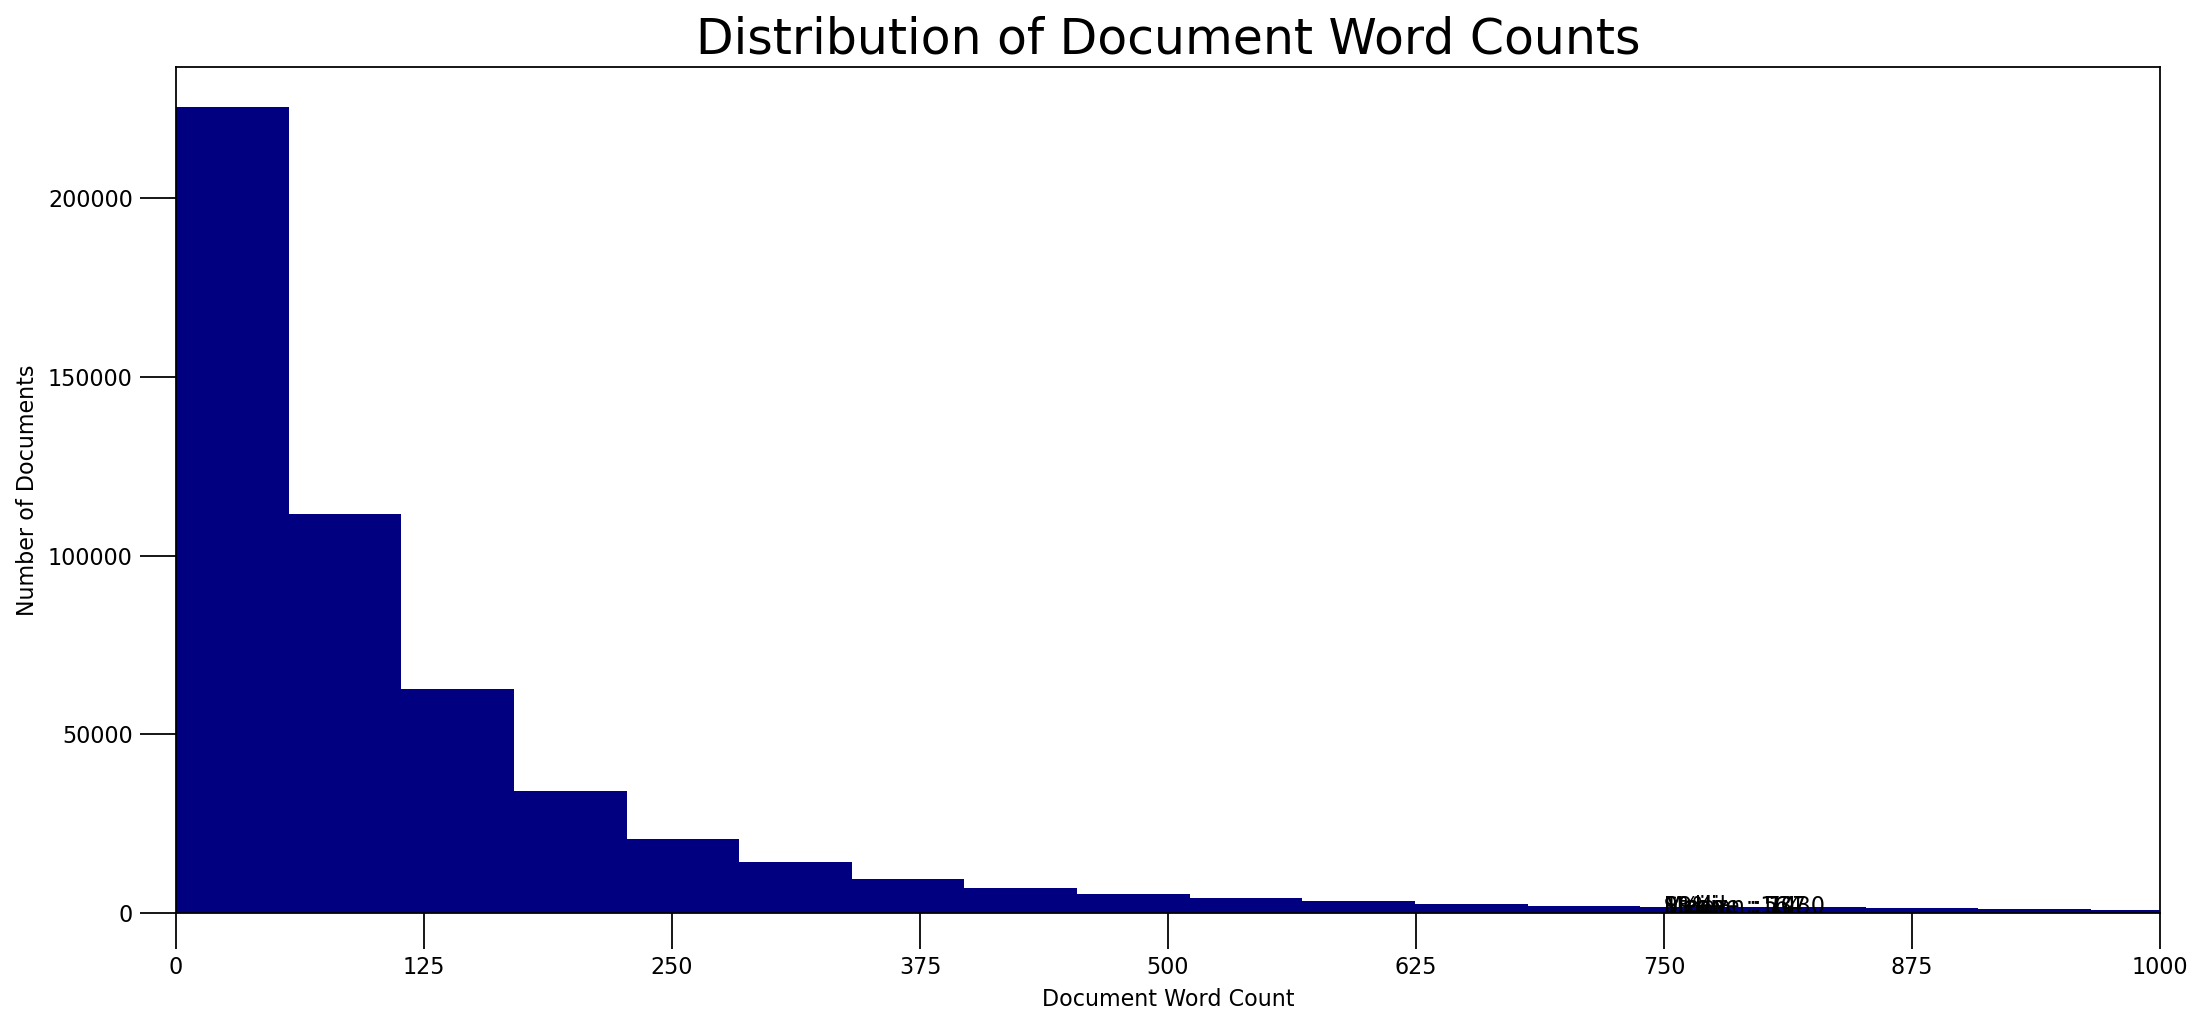

In [58]:

import matplotlib.pyplot as plt
import numpy as np
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

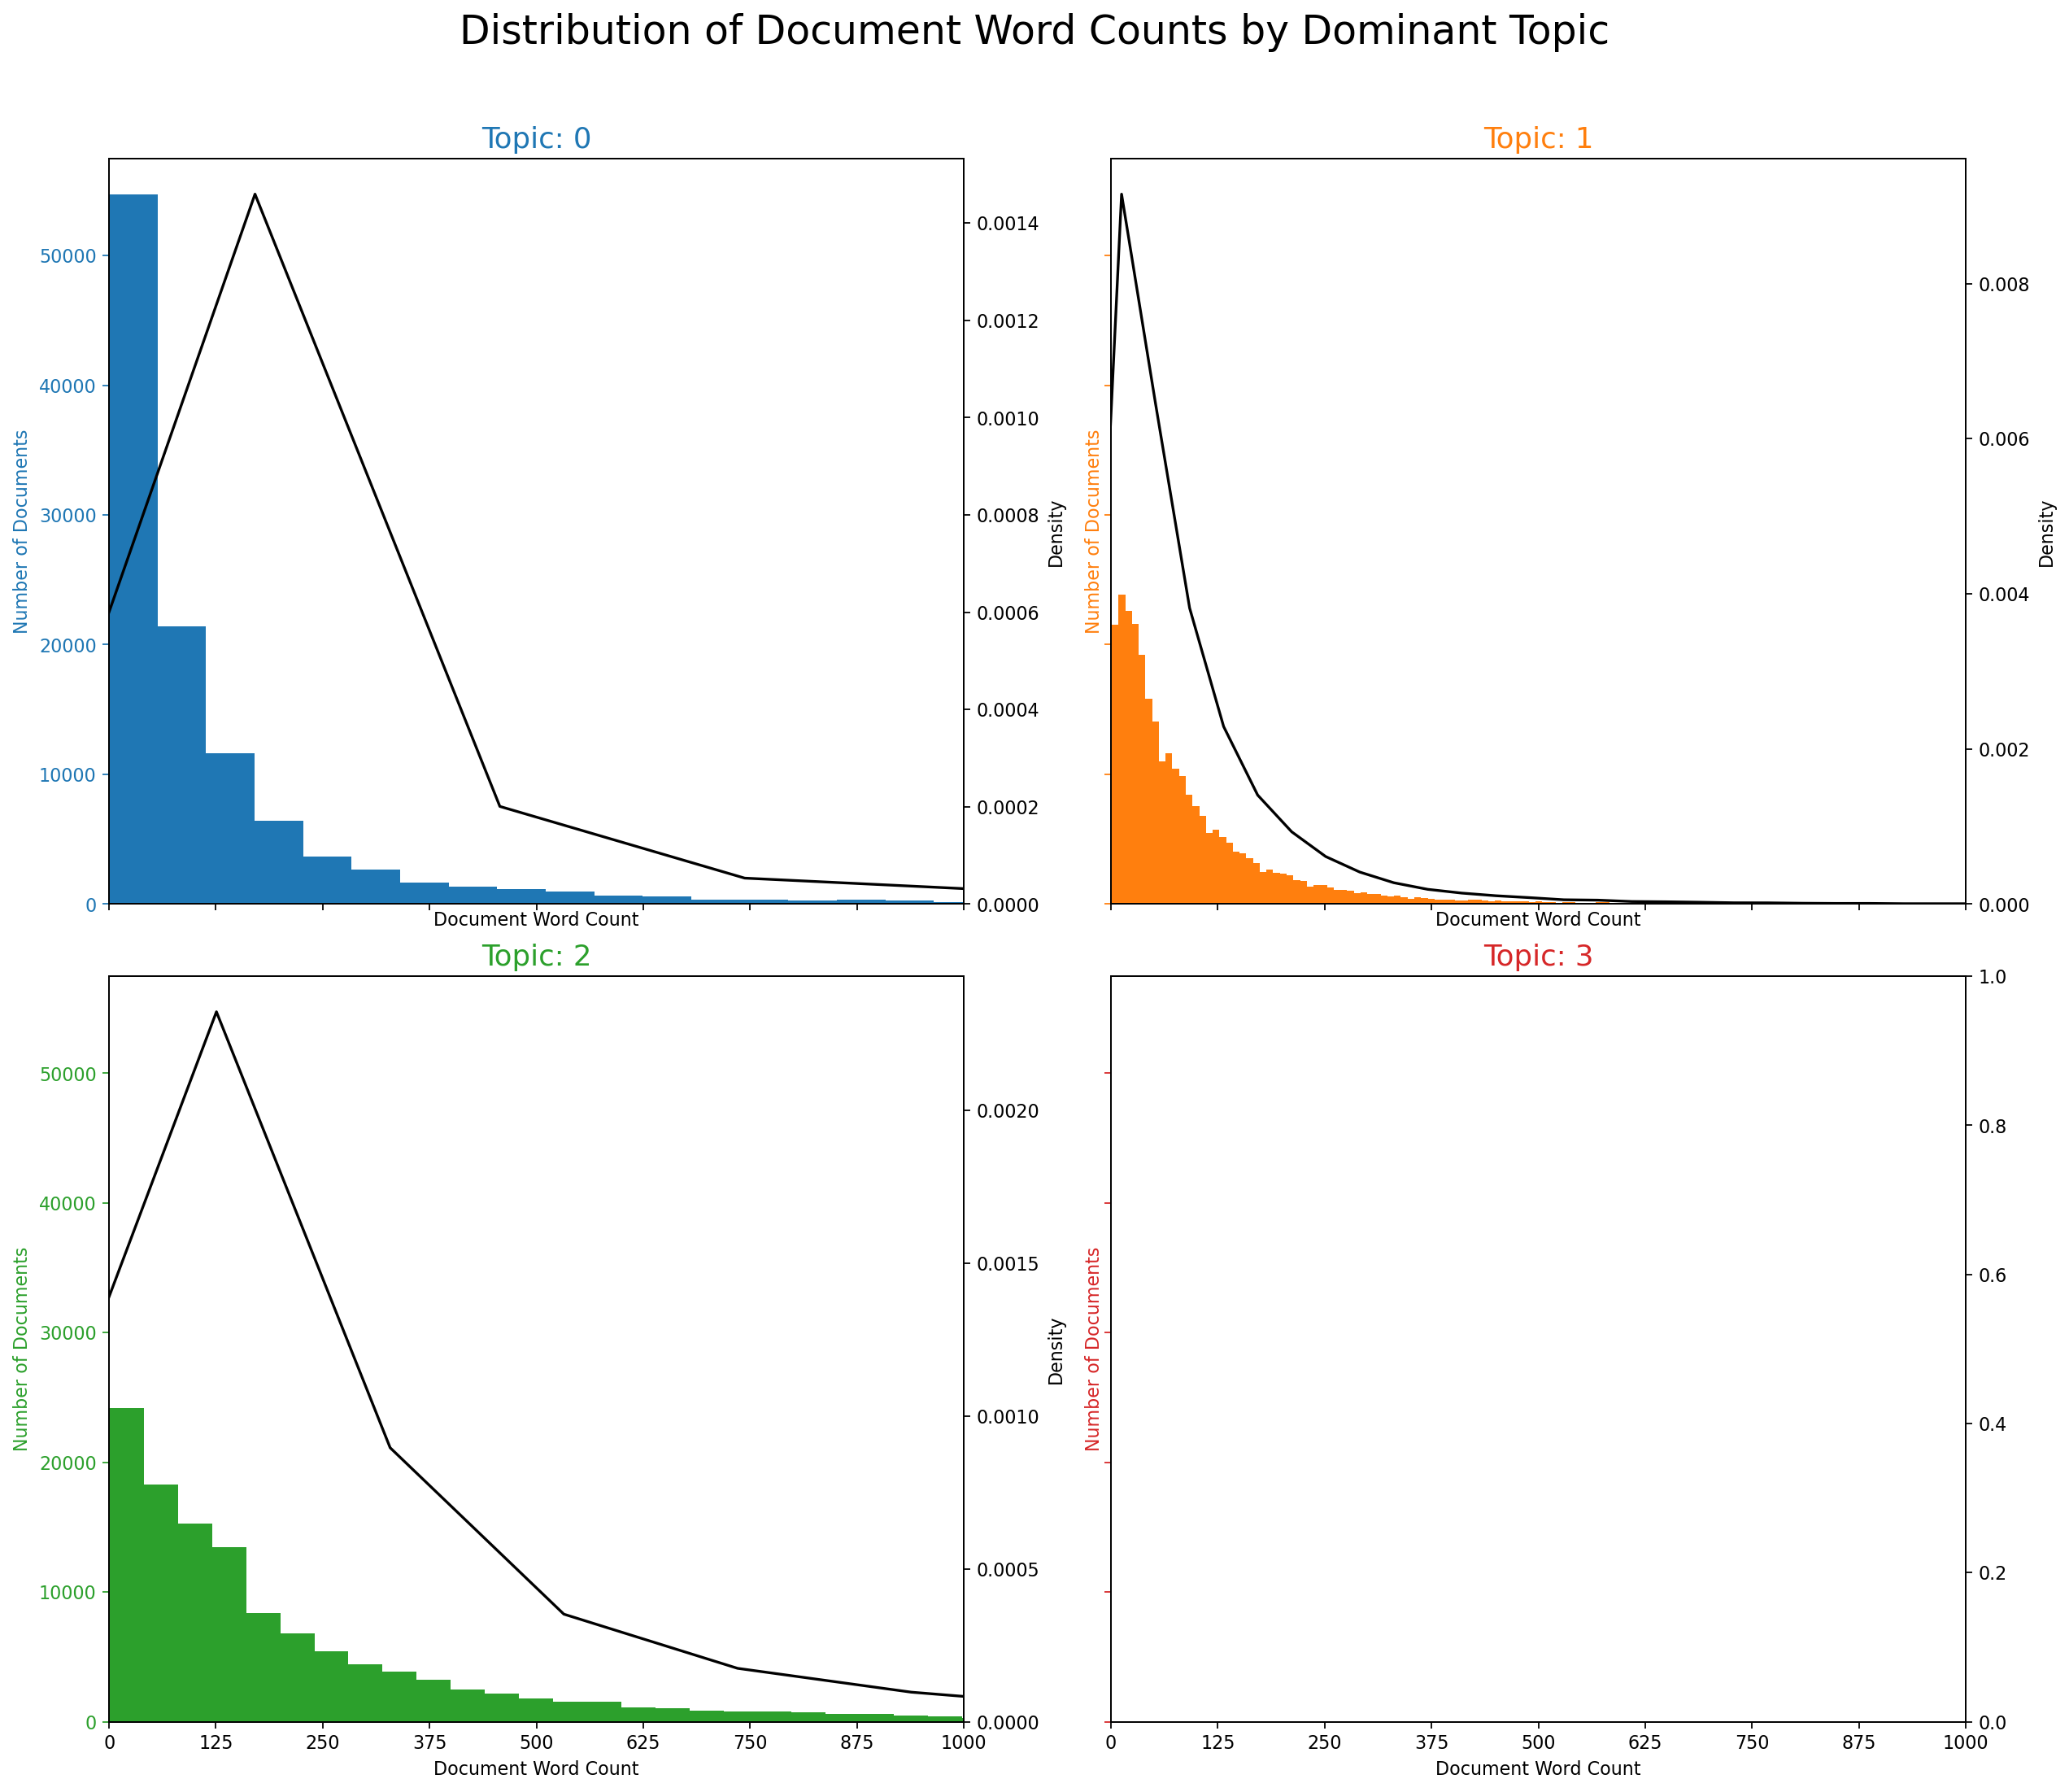

In [59]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# 4. Word Counts of Topic Keywords

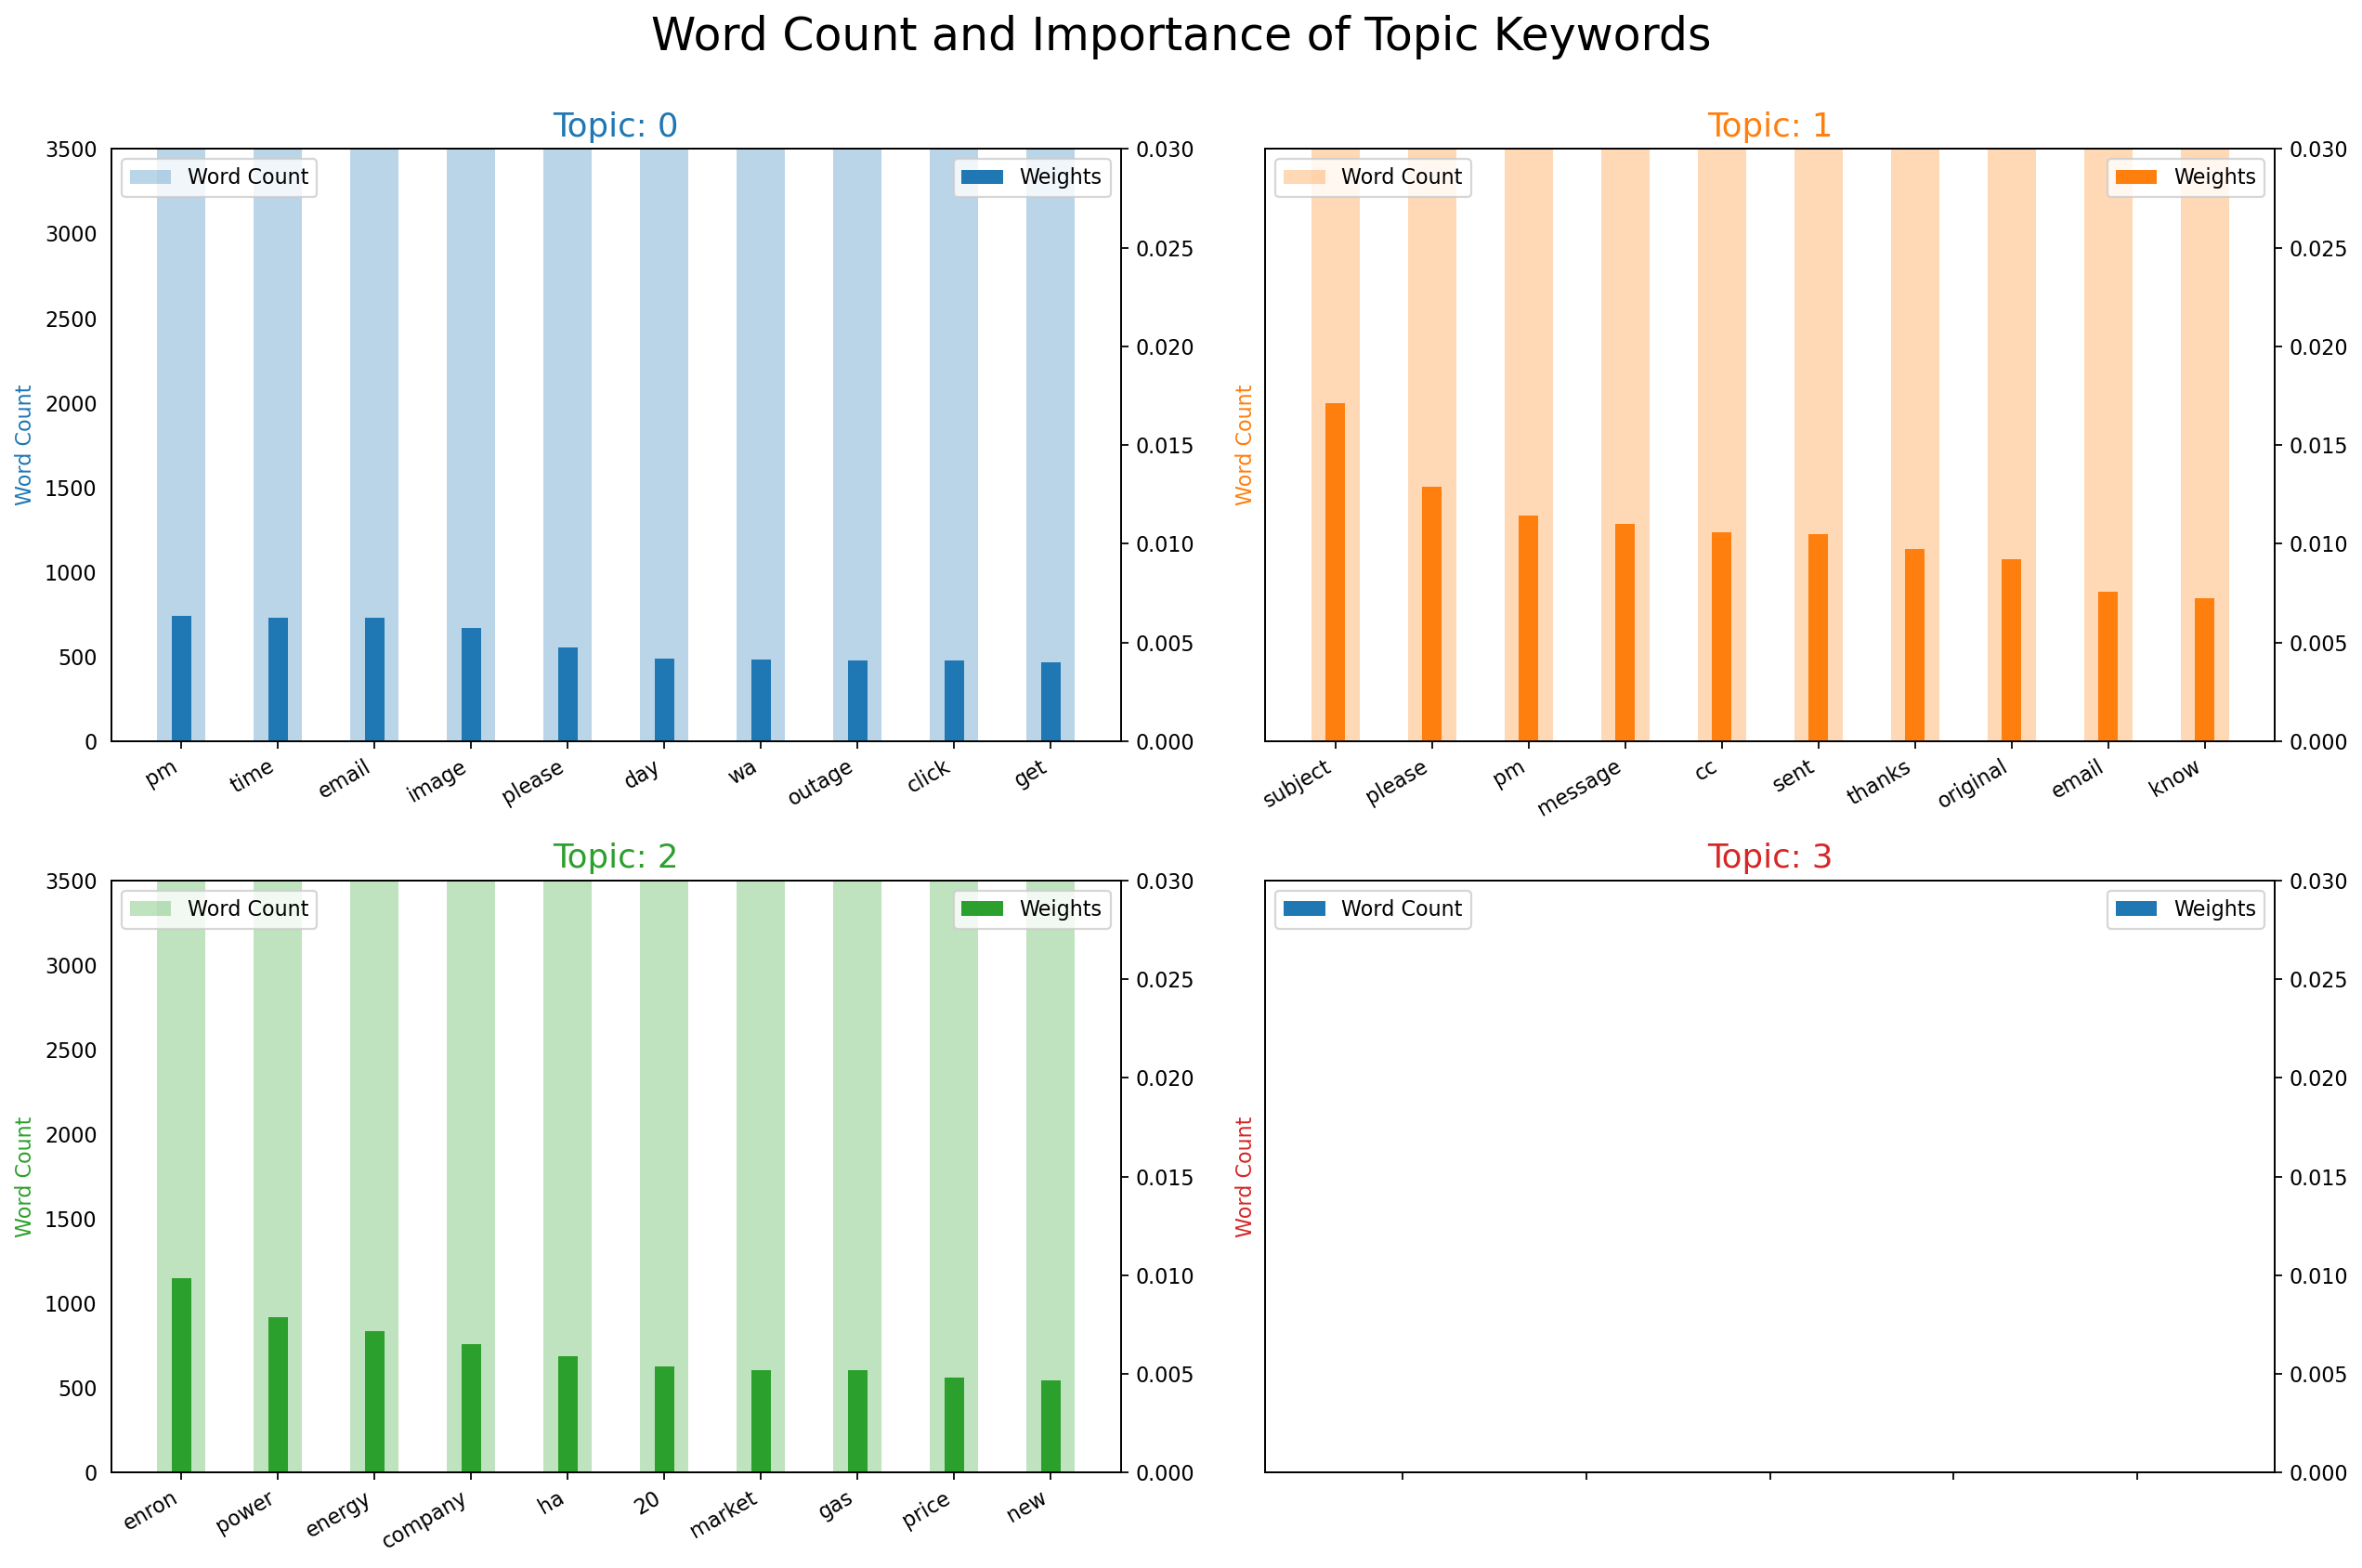

In [66]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in df_lemma_clean['text_lemmatized'] for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()